# Machine Learning Pipeline

A Machine Learning pipeline is a modular sequence of objects that codifies and automates a ML workflow to make it efficient, reproducible and generalizable. Turning a workflow into a pipeline has many other advantages too. Pipelines provide consistency the same steps will always be applied in the same order under the same conditions. They also are very concise and can streamline our code.

In this example, we will create a simple machine learning pipeline then compare the result to normal ML proceduce.

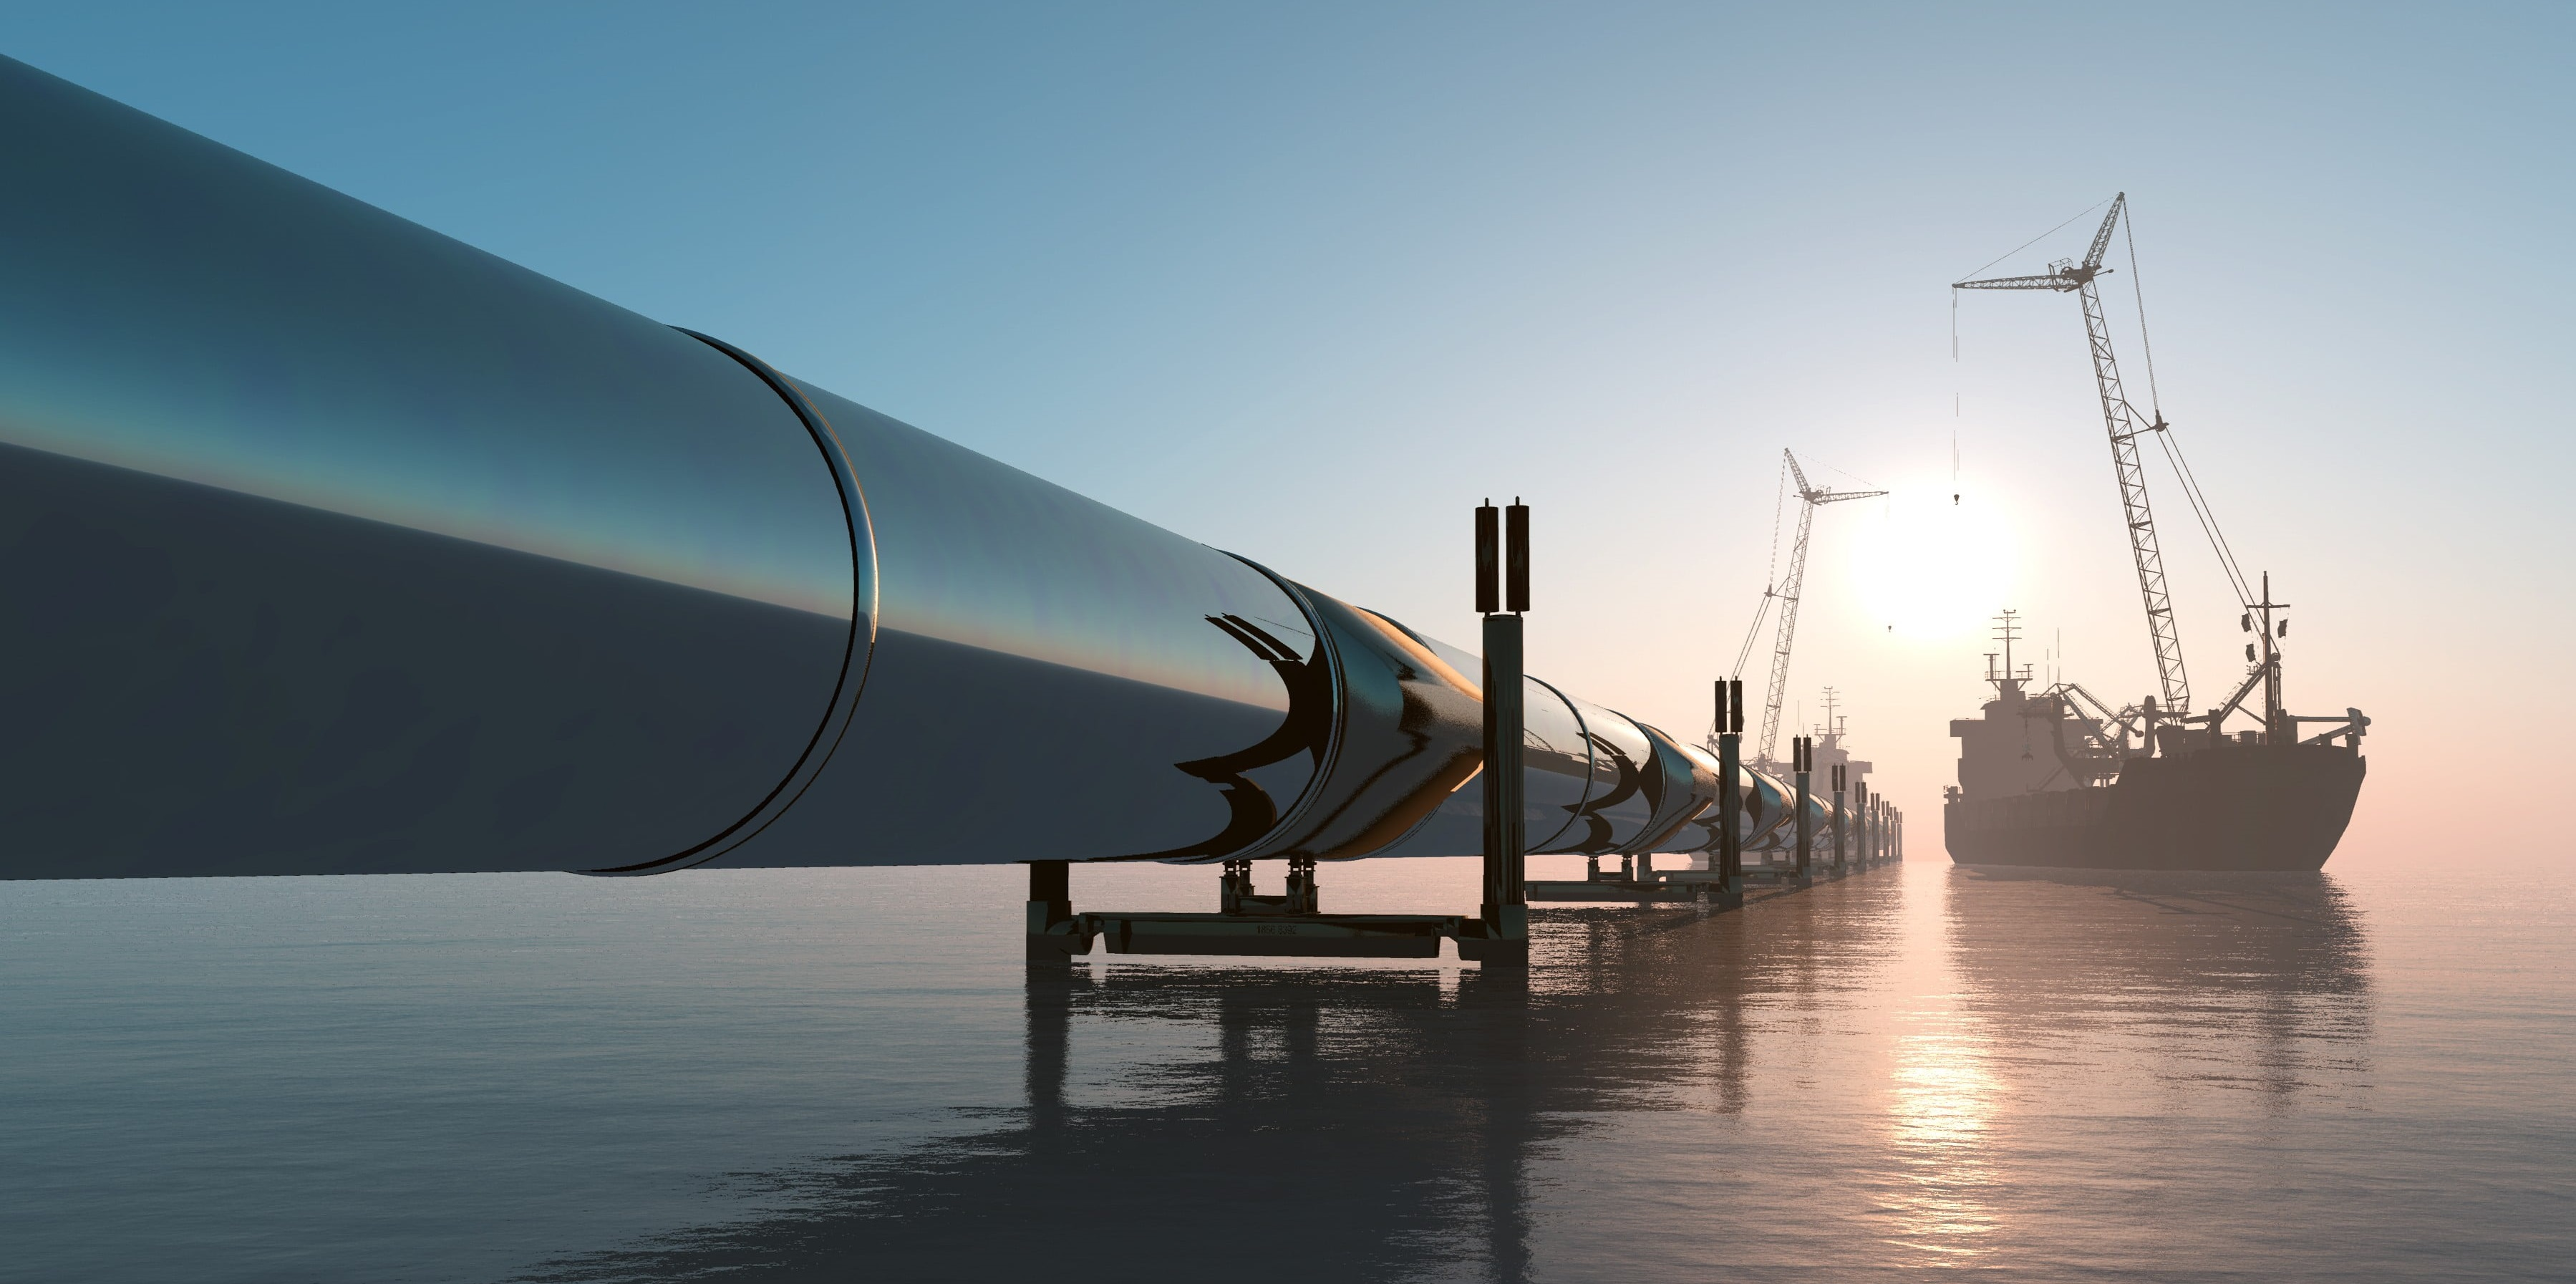

***

### Import Python Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

### Inpect The Dataset

In [2]:
columns = ["sex","length","diam","height","whole","shucked","viscera","shell","age"]
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data",names=columns)

print(df.shape)
df.head()

(4177, 9)


,sex,length,diam,height,whole,shucked,viscera,shell,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### Define x and y
Predict age base on given numerical and categorical features. 

In [3]:
y=df.age
X=df.drop(columns=['age'])

In [ ]:
# simulate some missing values
# for i in range(1000):
#     X.loc[np.random.choice(X.index),np.random.choice(X.columns)] = np.nan

### Data split

In [4]:
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.25)

***

# Pipeline Numerical Features

In [5]:
# retrieve numeric features name
num_cols = X.select_dtypes(include=np.number).columns

Creating a 2 steps pipeline

1. SimpleImputer
    - Fill in missing value with the mean of it's column
    - SimpleImputer replaces value for both the x and y training dataset


2. StandardScaler
   - Just like the normal procedure StandardScaler will fit_transform the x_train data while will applying the transform method for the test data.
   - Fit x_train[num_cols], we only need the numeric features

In [6]:
numeric_pipeline = Pipeline(
    
    steps=[
        # step1
        ('imputation_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
        # step2
        ('scaler', StandardScaler())
          ]
    )

numeric_pipeline
# numeric_pipeline.fit(x_train[num_cols])

Pipeline(steps=[('imputation_mean', SimpleImputer()),
                ('scaler', StandardScaler())])

# Pipeline Categorical Features

In [7]:
# retrieve categorical features name
cat_cols = X.select_dtypes(include=['object']).columns

Creating a 2 steps pipeline

1. SimpleImputer
    - Fill in missing value with the string 'missing'
    - SimpleImputer replaces value for both the x and y training dataset


2. OneHotEncoder
   - OHE will create a new column of each features making it's value into 0 and 1. 
   - Fit x_train[cat_cols], we only need the categorical features

In [8]:
categorical_pipeline = Pipeline(
    
    steps=[
        # step1
        ('imputation_constant', SimpleImputer(fill_value='missing', strategy='constant')),
        # step2
        ('OHE', OneHotEncoder())
          ]
    )

categorical_pipeline
# categorical_pipeline.fit(x_train[cat_cols])

Pipeline(steps=[('imputation_constant',
                 SimpleImputer(fill_value='missing', strategy='constant')),
                ('OHE', OneHotEncoder())])

# Combine Numerical and Categorical Pipeline

Combining the numeric and categorical pipeline using ColumnTrnasformer.

In [9]:
pipeline_combine = ColumnTransformer(
                        [
                            ('numeric', numeric_pipeline, num_cols),
                            ('categorical', categorical_pipeline, cat_cols)
                        ])
pipeline_combine

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputation_mean',
                                                  SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 Index(['length', 'diam', 'height', 'whole', 'shucked', 'viscera', 'shell'], dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('imputation_constant',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('OHE', OneHotEncoder())]),
                                 Index(['sex'], dtype='object'))])

Creating the final pipeline with the pipeline_combine and an estimator (LinearRegression)

In [10]:
final_pipeline = Pipeline(
    [
        ('pipeline_combine', pipeline_combine),
        ('regression', LinearRegression())
    ])
final_pipeline

Pipeline(steps=[('pipeline_combine',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputation_mean',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['length', 'diam', 'height', 'whole', 'shucked', 'viscera', 'shell'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputation_constant',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('OHE',
                                                                   OneHotEncoder())]),
                                                  Index(['sex'], dtype='object'))])),
                ('regression', LinearRegression())])

Fitting the training dataset

In [11]:
final_pipeline.fit(x_train, y_train)

Pipeline(steps=[('pipeline_combine',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputation_mean',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['length', 'diam', 'height', 'whole', 'shucked', 'viscera', 'shell'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputation_constant',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('OHE',
                                                                   OneHotEncoder())]),
                                                  Index(['sex'], dtype='object'))])),
                ('regression', LinearRegression())])

Making Prediction

In [13]:
y_pred = final_pipeline.predict(x_test)
y_pred = pd.DataFrame(y_pred).rename(columns={0:'pipeline_prediction'})
y_pred.head(3)

,pipeline_prediction
0,13.221121
1,9.111638
2,10.327871


******

# Normal Method

In [14]:
columns = ["sex","length","diam","height","whole","shucked","viscera","shell","age"]
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data",names=columns)

print(df.shape)
df.head()

(4177, 9)


,sex,length,diam,height,whole,shucked,viscera,shell,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [15]:
# fill np.nan in sex columns with string 'missing'
df['sex'] = df['sex'].replace([np.nan], 'missing')

In [16]:
# OHE sex column
df = pd.get_dummies(df, columns=['sex'])

In [17]:
# retrieve numerical features except 'age'
n=df.iloc[:,0:7].columns

In [18]:
# convert np.nan into mean values
for i in n:
    df[i].fillna(df[i].mean())

In [19]:
y=df.age
X=df.drop(columns=['age'])

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.25)

In [21]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [22]:
lr = LinearRegression()

In [23]:
lr.fit(x_train, y_train)

LinearRegression()

In [27]:
y_pred2=lr.predict(x_test)
y_pred2 = pd.DataFrame(y_pred2).rename(columns={0:'manual_prediction'})
y_pred2.head(3)

,manual_prediction
0,13.221121
1,9.111638
2,10.327871


***

# Comparing Normal Method  vs. using Pipeline

In [43]:
prediction_table = pd.concat([y_pred, y_pred2], axis=1)

In [44]:
prediction_table['difference'] = round(abs(prediction_table['pipeline_prediction'] - prediction_table['manual_prediction']))

In [45]:
prediction_table

,pipeline_prediction,manual_prediction,difference
0,13.221121,13.221121,0.0
1,9.111638,9.111638,0.0
2,10.327871,10.327871,0.0
3,5.537119,5.537119,0.0
4,10.598690,10.598690,0.0
...,...,...,...
1040,11.584460,11.584460,0.0
1041,9.935649,9.935649,0.0
1042,10.224546,10.224546,0.0
1043,12.563462,12.563462,0.0


Both method gives the same result thus using pipeline giving us consistent and reusable code.

-fin